**Proyecciones del dolar paralelo en Venezuela**

Data: https://dolartoday.com/historico-dolar/ (Enlace directo: https://dxj1e0bbbefdtsyig.woldrssl.net/custom/dolartoday.xlsx)

Librería para análisis de series temporales: fbProphet 

Autor: Prof. Haller Bracho



In [102]:
# Librerías
import pandas as pd 
import matplotlib.pyplot as plt
from fbprophet import Prophet

from fbprophet.plot import add_changepoints_to_plot

%matplotlib inline


In [103]:
# Carga de datos
df = pd.read_excel('DT.xlsx',  usecols=[0,1])


In [104]:
df['ds'] = df['Fecha']
df['y'] = df['DolarToday']


In [105]:
df.tail()


,Fecha,DolarToday,ds,y
2757,6-24-2018,2951374.61,6-24-2018,2951374.61
2758,6-25-2018,2955830.74,6-25-2018,2955830.74
2759,6-26-2018,3300248.25,6-26-2018,3300248.25
2760,6-27-2018,3402186.33,6-27-2018,3402186.33
2761,6-28-2018,3408671.41,6-28-2018,3408671.41


In [106]:
# data = df[:2749]
data = df.tail(51)
# data = df[2585:2749]
# data = df[:2749]

In [107]:
data.tail()

,Fecha,DolarToday,ds,y
2757,6-24-2018,2951374.61,6-24-2018,2951374.61
2758,6-25-2018,2955830.74,6-25-2018,2955830.74
2759,6-26-2018,3300248.25,6-26-2018,3300248.25
2760,6-27-2018,3402186.33,6-27-2018,3402186.33
2761,6-28-2018,3408671.41,6-28-2018,3408671.41


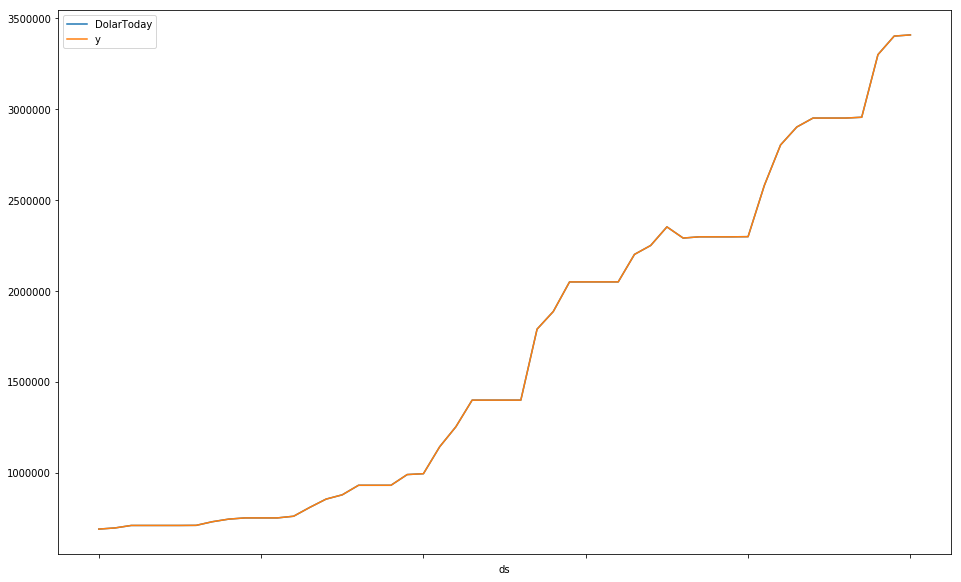

In [108]:
data.set_index('ds').plot(figsize=(16,10))

In [123]:
# Creación del modelo
modelo = Prophet(weekly_seasonality=True, yearly_seasonality=False, daily_seasonality=False)

# Entrenamiento del modelo
modelo.fit(data)

# Periodo a predecir
futuro = modelo.make_future_dataframe(periods=8, include_history=False, freq='D')

# Predicción
prediccion = modelo.predict(futuro)


/home/habracho/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [124]:
prediccion[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(8)


,ds,yhat,yhat_lower,yhat_upper
0,2018-06-29,3.441146e+06,3.327447e+06,3.563947e+06
1,2018-06-30,3.461000e+06,3.340917e+06,3.575901e+06
2,2018-07-01,3.479315e+06,3.354500e+06,3.594958e+06
3,2018-07-02,3.529660e+06,3.411591e+06,3.656421e+06
4,2018-07-03,3.706199e+06,3.586603e+06,3.829628e+06
5,2018-07-04,3.832628e+06,3.697984e+06,3.960479e+06
6,2018-07-05,3.897163e+06,3.785445e+06,4.017675e+06
7,2018-07-06,3.954400e+06,3.821716e+06,4.083009e+06


In [125]:
data.tail(14)

,Fecha,DolarToday,ds,y
2748,6-15-2018,2298257.33,6-15-2018,2298257.33
2749,6-16-2018,2298257.33,6-16-2018,2298257.33
2750,6-17-2018,2298257.33,6-17-2018,2298257.33
2751,6-18-2018,2299173.25,6-18-2018,2299173.25
2752,6-19-2018,2580622.73,6-19-2018,2580622.73
2753,6-20-2018,2803495.81,6-20-2018,2803495.81
2754,6-21-2018,2902142.35,6-21-2018,2902142.35
2755,6-22-2018,2951374.61,6-22-2018,2951374.61
2756,6-23-2018,2951374.61,6-23-2018,2951374.61
2757,6-24-2018,2951374.61,6-24-2018,2951374.61


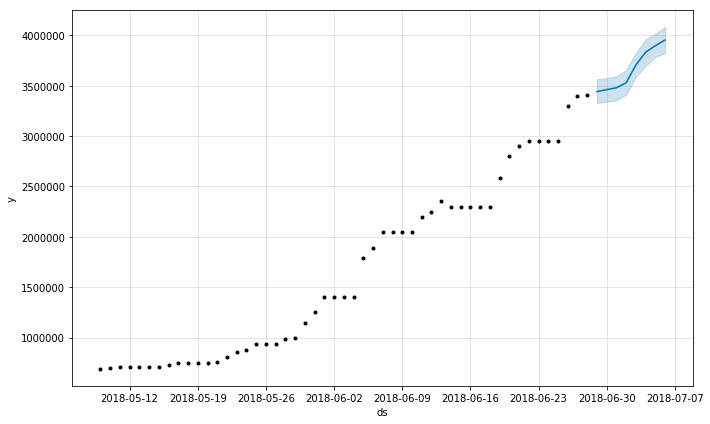

In [140]:
fig1 = modelo.plot(prediccion)


In [141]:
a = add_changepoints_to_plot(fig1.gca(), modelo, prediccion)

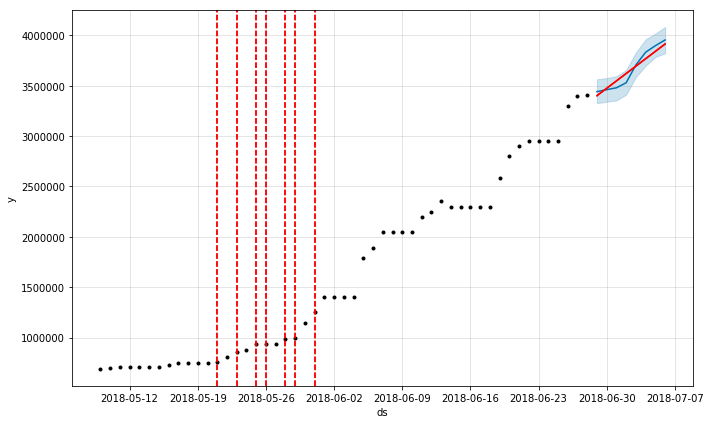

In [138]:
fig1


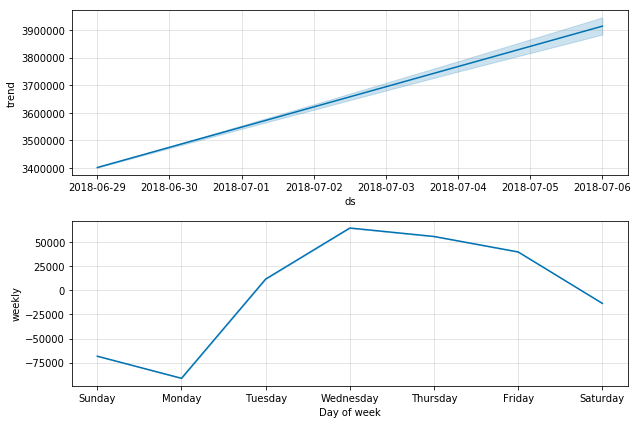

In [136]:
fig2 = modelo.plot_components(prediccion)
